🌟 AGRIMEDFINANCE AI ECOSYSTEM DEMO

🚨 EMERGENCY SCENARIO: Farmer Health Crisis
🏥 Medical AI: Healthy (Confidence: 0.52)
🌾 Agriculture AI: Crop health 79.0/100 - Good
🤖 AI Coordinator: Continue monitoring

⛈️  WEATHER EVENT: Severe Storm Predicted
🌾 Farm 1: Health 65.2/100
🌾 Farm 2: Health 72.0/100
🌾 Farm 3: Health 68.2/100
🤖 AI Coordinator: All farms prepared for weather event

📊 INDIVIDUAL MODULE DEMONSTRATIONS
🏥 TELEMEDICINE AI:
    Diagnosis: Healthy (0.50 confidence)
    Recommendation: Continue regular health monitoring

🌾 AGRICULTURE AI:
    Crop Health: 72.4/100 - Good
    Predicted Yield: 5.51 tons/hectare

💰 FINANCE AI:
    Credit Score: 582 (Poor)
    Fraud Risk: Low (0.000)

⛓️  SMART CONTRACT TRANSACTIONS:
------------------------------
Medical_Insurance: 0 transactions
Crop_Insurance: 0 transactions
Smart_Lending: 0 transactions

Total: 0 transactions, 0 gas used



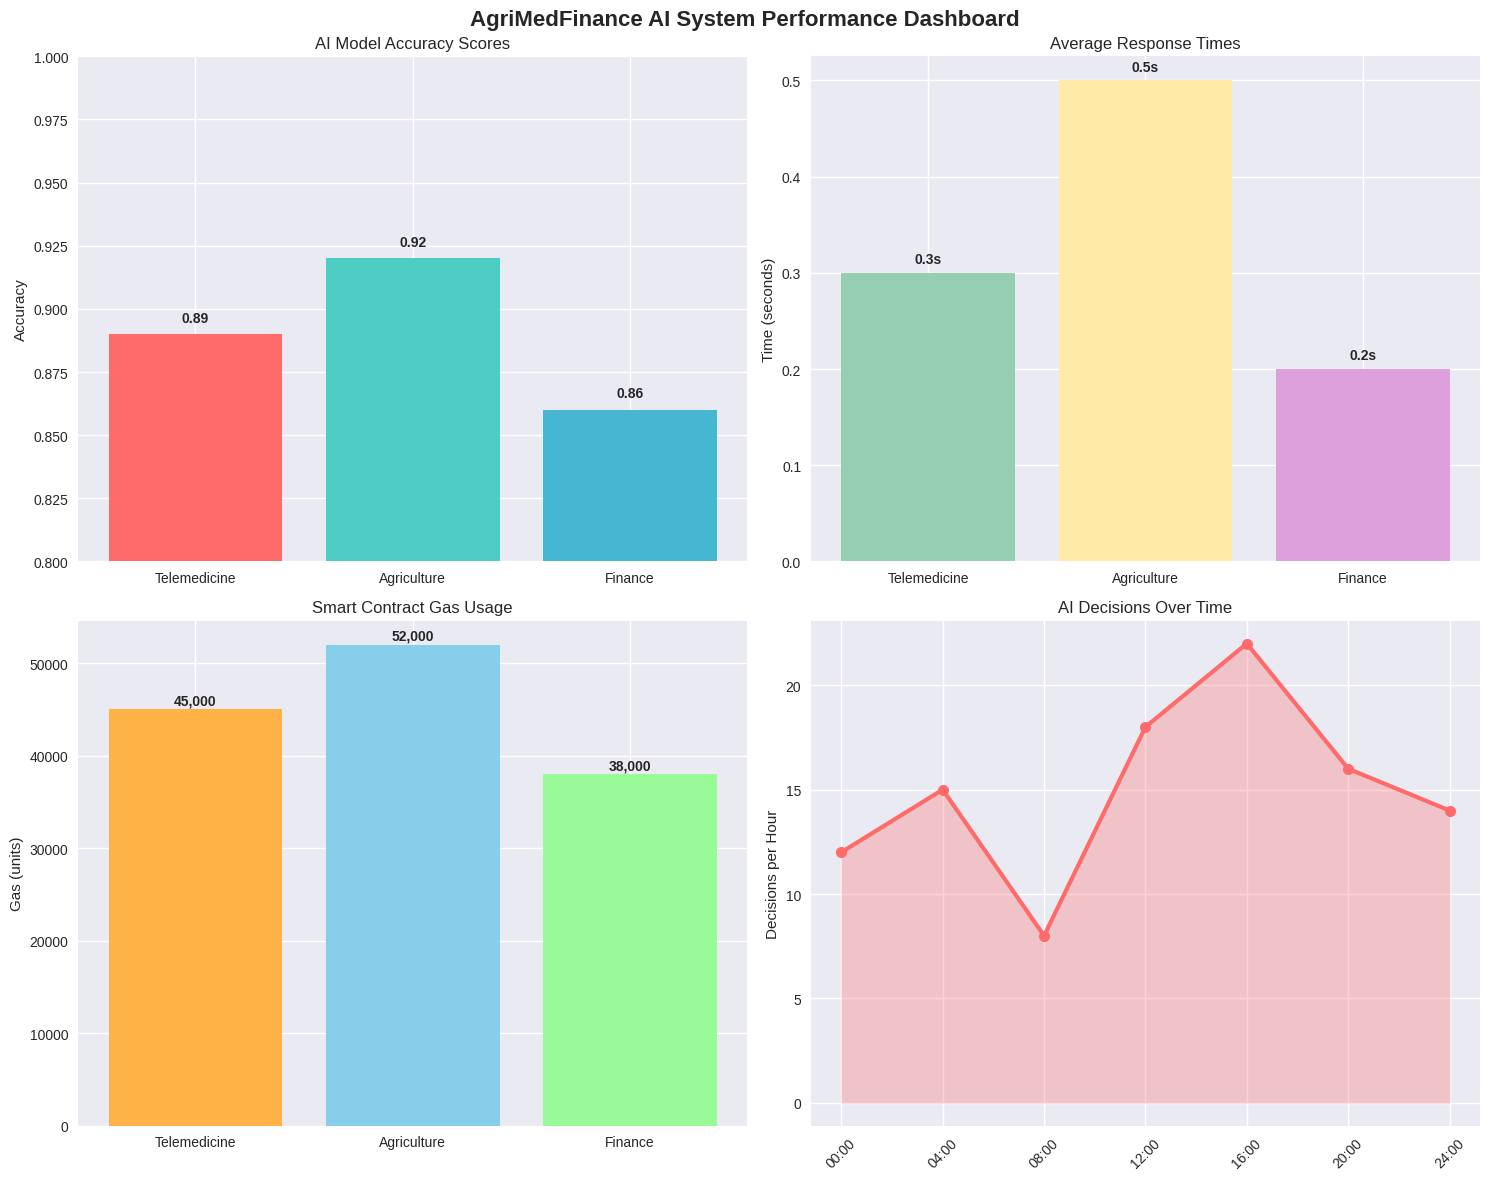

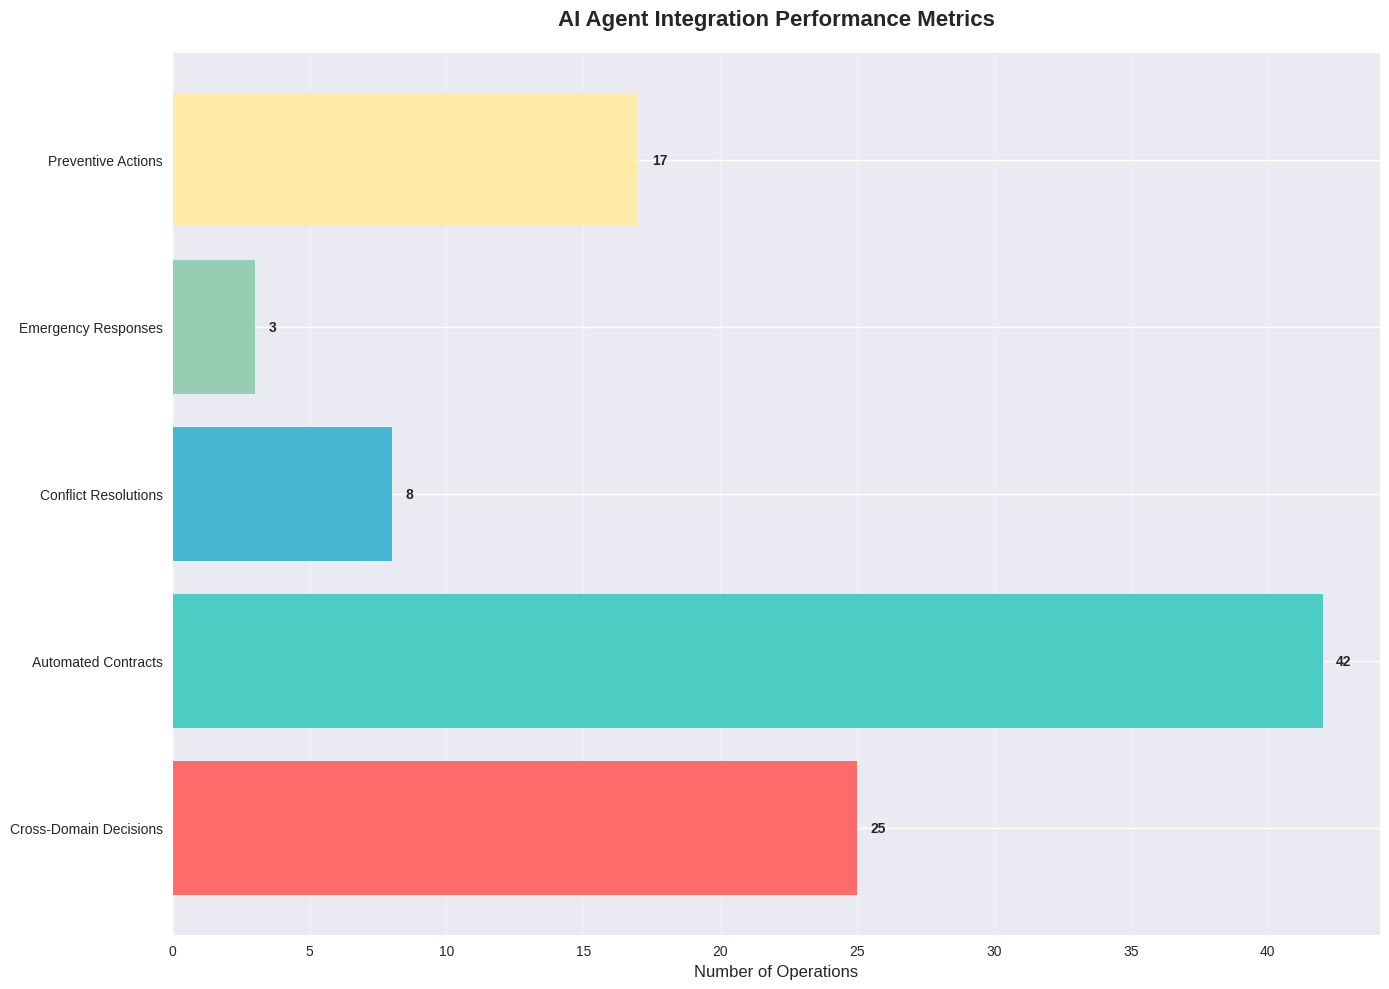

⛓️  SMART CONTRACT + AI INTEGRATION DEMO
📊 Contract Execution Summary:
    Total Contracts: 15
    Success Rate: 93.3%
    Average Gas Used: 45,596
    Average Execution Time: 0.42s


In [ ]:
# AgriMedFinance AI Ecosystem - Python Demo
# Run this in Google Colab or Jupyter Notebook

# Install required packages (run this first in Colab)
# !pip install scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import hashlib
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class SmartContract:
    """Simulated Smart Contract for demonstration"""

    def __init__(self, contract_type):
        self.contract_type = contract_type
        self.transactions = []
        self.balance = 1000000  # Starting balance in wei

    def execute_transaction(self, function_name, params, sender):
        """Simulate smart contract execution"""
        gas_used = np.random.randint(21000, 100000)
        success = True

        transaction = {
            'tx_hash': hashlib.sha256(f"{function_name}{datetime.now()}".encode()).hexdigest()[:16],
            'function': function_name,
            'params': params,
            'sender': sender,
            'gas_used': gas_used,
            'timestamp': datetime.now(),
            'success': success
        }

        self.transactions.append(transaction)
        return transaction

class TelemedicineAI:
    """AI Agent for Telemedicine Module"""

    def __init__(self):
        self.diagnostic_model = self._create_diagnostic_model()
        self.treatment_model = self._create_treatment_model()
        self.contract = SmartContract("Medical_Insurance")

    def _create_diagnostic_model(self):
        """Create a simple diagnostic model"""
        # Simulate training data
        np.random.seed(42)
        n_samples = 1000

        # Features: age, symptoms_count, vital_signs, lab_results
        X = np.random.randn(n_samples, 4)
        X[:, 0] = np.random.randint(18, 80, n_samples)  # age
        X[:, 1] = np.random.randint(1, 10, n_samples)  # symptoms count

        # Target: 0=healthy, 1=needs_consultation, 2=emergency
        y = np.random.choice([0, 1, 2], n_samples, p=[0.6, 0.3, 0.1])

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def _create_treatment_model(self):
        """Create treatment recommendation model"""
        np.random.seed(42)
        n_samples = 500

        # Features: diagnosis_severity, patient_age, medical_history
        X = np.random.randn(n_samples, 3)
        # Target: treatment_cost
        y = np.random.uniform(50, 2000, n_samples)

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def diagnose_patient(self, patient_data):
        """AI-powered patient diagnosis"""
        features = np.array([
            patient_data['age'],
            patient_data['symptoms_count'],
            patient_data['blood_pressure'],
            patient_data['lab_results']
        ]).reshape(1, -1)

        diagnosis = self.diagnostic_model.predict(features)[0]
        confidence = max(self.diagnostic_model.predict_proba(features)[0])

        diagnosis_map = {0: "Healthy", 1: "Needs Consultation", 2: "Emergency"}

        return {
            'diagnosis': diagnosis_map[diagnosis],
            'confidence': confidence,
            'recommendation': self._get_recommendation(diagnosis)
        }

    def _get_recommendation(self, diagnosis):
        recommendations = {
            0: "Continue regular health monitoring",
            1: "Schedule consultation within 48 hours",
            2: "Immediate medical attention required"
        }
        return recommendations[diagnosis]

    def process_insurance_claim(self, patient_id, diagnosis, estimated_cost):
        """Process insurance claim through smart contract"""
        if diagnosis in ["Needs Consultation", "Emergency"]:
            # Auto-approve claims under $500 or emergency cases
            auto_approve = estimated_cost < 500 or diagnosis == "Emergency"

            claim_data = {
                'patient_id': patient_id,
                'diagnosis': diagnosis,
                'amount': estimated_cost,
                'auto_approved': auto_approve
            }

            tx = self.contract.execute_transaction(
                'submitClaim',
                claim_data,
                f"patient_{patient_id}"
            )

            return {
                'claim_approved': auto_approve,
                'transaction_hash': tx['tx_hash'],
                'gas_used': tx['gas_used']
            }

        return {'claim_approved': False, 'reason': 'No treatment needed'}

class AgricultureAI:
    """AI Agent for Agriculture Module"""

    def __init__(self):
        self.crop_health_model = self._create_crop_model()
        self.yield_prediction_model = self._create_yield_model()
        self.weather_model = self._create_weather_model()
        self.contract = SmartContract("Crop_Insurance")

    def _create_crop_model(self):
        """Create crop health assessment model"""
        np.random.seed(42)
        n_samples = 800

        # Features: soil_moisture, temperature, rainfall, fertilizer_used
        X = np.random.randn(n_samples, 4)
        X[:, 0] = np.random.uniform(0.2, 0.8, n_samples)  # soil moisture
        X[:, 1] = np.random.uniform(15, 35, n_samples)    # temperature
        X[:, 2] = np.random.uniform(0, 200, n_samples)    # rainfall
        X[:, 3] = np.random.uniform(0, 100, n_samples)    # fertilizer

        # Target: crop health score (0-100)
        y = np.random.uniform(40, 100, n_samples)

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def _create_yield_model(self):
        """Create crop yield prediction model"""
        np.random.seed(42)
        n_samples = 600

        X = np.random.randn(n_samples, 5)
        y = np.random.uniform(2, 8, n_samples)  # tons per hectare

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def _create_weather_model(self):
        """Create weather prediction model"""
        np.random.seed(42)
        n_samples = 400

        X = np.random.randn(n_samples, 3)
        y = np.random.choice([0, 1], n_samples, p=[0.8, 0.2])  # 0=normal, 1=extreme weather

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def assess_crop_health(self, field_data):
        """AI-powered crop health assessment"""
        features = np.array([
            field_data['soil_moisture'],
            field_data['temperature'],
            field_data['rainfall'],
            field_data['fertilizer_used']
        ]).reshape(1, -1)

        health_score = self.crop_health_model.predict(features)[0]

        return {
            'health_score': health_score,
            'status': 'Good' if health_score > 70 else 'Needs Attention' if health_score > 50 else 'Poor',
            'recommendation': self._get_crop_recommendation(health_score)
        }

    def predict_yield(self, crop_data):
        """Predict crop yield"""
        features = np.random.randn(1, 5)  # Simplified for demo
        yield_prediction = self.yield_prediction_model.predict(features)[0]

        return {
            'predicted_yield': round(yield_prediction, 2),
            'confidence_interval': (round(yield_prediction * 0.9, 2), round(yield_prediction * 1.1, 2))
        }

    def _get_crop_recommendation(self, health_score):
        if health_score > 80:
            return "Maintain current practices"
        elif health_score > 60:
            return "Increase irrigation and monitor closely"
        else:
            return "Immediate intervention required - check soil and pest conditions"

    def process_crop_insurance(self, farmer_id, crop_type, coverage_amount):
        """Process crop insurance through smart contract"""
        premium = coverage_amount * 0.05  # 5% premium rate

        insurance_data = {
            'farmer_id': farmer_id,
            'crop_type': crop_type,
            'coverage': coverage_amount,
            'premium': premium
        }

        tx = self.contract.execute_transaction(
            'createInsurancePolicy',
            insurance_data,
            f"farmer_{farmer_id}"
        )

        return {
            'policy_created': True,
            'premium': premium,
            'transaction_hash': tx['tx_hash']
        }

class FinanceAI:
    """AI Agent for Finance Module"""

    def __init__(self):
        self.credit_model = self._create_credit_model()
        self.fraud_model = self._create_fraud_model()
        self.risk_model = self._create_risk_model()
        self.contract = SmartContract("Smart_Lending")

    def _create_credit_model(self):
        """Create credit scoring model"""
        np.random.seed(42)
        n_samples = 1000

        # Features: income, debt_ratio, payment_history, assets
        X = np.random.randn(n_samples, 4)
        X[:, 0] = np.random.uniform(20000, 150000, n_samples)  # income
        X[:, 1] = np.random.uniform(0.1, 0.8, n_samples)      # debt ratio
        X[:, 2] = np.random.uniform(0.5, 1.0, n_samples)      # payment history
        X[:, 3] = np.random.uniform(10000, 500000, n_samples) # assets

        # Normalize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Target: credit score (300-850)
        y = np.random.uniform(300, 850, n_samples)

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X_scaled, y)

        return {'model': model, 'scaler': scaler}

    def _create_fraud_model(self):
        """Create fraud detection model"""
        np.random.seed(42)
        n_samples = 800

        X = np.random.randn(n_samples, 6)
        y = np.random.choice([0, 1], n_samples, p=[0.95, 0.05])  # 5% fraud rate

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def _create_risk_model(self):
        """Create risk assessment model"""
        np.random.seed(42)
        n_samples = 500

        X = np.random.randn(n_samples, 4)
        y = np.random.uniform(0.01, 0.15, n_samples)  # Risk score 1-15%

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def calculate_credit_score(self, applicant_data):
        """AI-powered credit scoring"""
        features = np.array([
            applicant_data['income'],
            applicant_data['debt_ratio'],
            applicant_data['payment_history'],
            applicant_data['assets']
        ]).reshape(1, -1)

        features_scaled = self.credit_model['scaler'].transform(features)
        credit_score = self.credit_model['model'].predict(features_scaled)[0]

        return {
            'credit_score': int(credit_score),
            'rating': self._get_credit_rating(credit_score),
            'approval_probability': self._get_approval_probability(credit_score)
        }

    def detect_fraud(self, transaction_data):
        """AI-powered fraud detection"""
        features = np.random.randn(1, 6)  # Simplified for demo
        fraud_probability = self.fraud_model.predict_proba(features)[0][1]

        return {
            'is_fraud': fraud_probability > 0.5,
            'fraud_probability': fraud_probability,
            'risk_level': 'High' if fraud_probability > 0.7 else 'Medium' if fraud_probability > 0.3 else 'Low'
        }

    def _get_credit_rating(self, score):
        if score >= 750:
            return "Excellent"
        elif score >= 700:
            return "Good"
        elif score >= 650:
            return "Fair"
        else:
            return "Poor"

    def _get_approval_probability(self, score):
        return min(max((score - 300) / 550, 0), 1)

    def process_loan_application(self, applicant_id, loan_amount, collateral):
        """Process loan through smart contract"""
        credit_info = self.calculate_credit_score({
            'income': np.random.uniform(30000, 100000),
            'debt_ratio': np.random.uniform(0.2, 0.6),
            'payment_history': np.random.uniform(0.7, 1.0),
            'assets': np.random.uniform(50000, 300000)
        })

        interest_rate = max(0.05, 0.15 - (credit_info['credit_score'] - 300) / 5500)
        approved = credit_info['credit_score'] > 650

        loan_data = {
            'applicant_id': applicant_id,
            'amount': loan_amount,
            'interest_rate': interest_rate,
            'collateral': collateral,
            'approved': approved,
            'credit_score': credit_info['credit_score']
        }

        tx = self.contract.execute_transaction(
            'applyForLoan',
            loan_data,
            f"applicant_{applicant_id}"
        )

        return {
            'loan_approved': approved,
            'interest_rate': interest_rate,
            'credit_score': credit_info['credit_score'],
            'transaction_hash': tx['tx_hash']
        }

class AgenticOrchestrator:
    """Multi-Agent Orchestration System"""

    def __init__(self):
        self.telemedicine = TelemedicineAI()
        self.agriculture = AgricultureAI()
        self.finance = FinanceAI()
        self.decisions_log = []

    def coordinate_farmer_health_emergency(self, farmer_data):
        """Coordinate response to farmer health emergency"""
        print("🚨 EMERGENCY SCENARIO: Farmer Health Crisis")
        print("=" * 50)

        # Step 1: Medical Assessment
        medical_result = self.telemedicine.diagnose_patient(farmer_data['health_data'])
        print(f"🏥 Medical AI: {medical_result['diagnosis']} (Confidence: {medical_result['confidence']:.2f})")

        # Step 2: Process Insurance Claim
        if medical_result['diagnosis'] != "Healthy":
            estimated_cost = np.random.uniform(200, 1500)
            insurance_result = self.telemedicine.process_insurance_claim(
                farmer_data['farmer_id'],
                medical_result['diagnosis'],
                estimated_cost
            )
            print(f"💰 Insurance: {'Approved' if insurance_result['claim_approved'] else 'Denied'} - ${estimated_cost:.2f}")

        # Step 3: Assess Farm Impact
        crop_result = self.agriculture.assess_crop_health(farmer_data['field_data'])
        print(f"🌾 Agriculture AI: Crop health {crop_result['health_score']:.1f}/100 - {crop_result['status']}")

        # Step 4: Financial Adjustment
        if medical_result['diagnosis'] == "Emergency":
            # Temporarily adjust credit terms
            credit_adjustment = self.finance.calculate_credit_score(farmer_data['financial_data'])
            print(f"📊 Finance AI: Credit score {credit_adjustment['credit_score']} - Emergency support activated")

        # Step 5: Coordinated Decision
        decision = self._make_coordinated_decision(medical_result, crop_result, farmer_data)
        self.decisions_log.append(decision)

        print(f"🤖 AI Coordinator: {decision['action']}")
        print()

        return decision

    def coordinate_weather_event(self, weather_data):
        """Coordinate response to severe weather event"""
        print("⛈️  WEATHER EVENT: Severe Storm Predicted")
        print("=" * 50)

        # Agriculture impact assessment
        for i, farm in enumerate(weather_data['affected_farms']):
            crop_assessment = self.agriculture.assess_crop_health(farm)
            print(f"🌾 Farm {i+1}: Health {crop_assessment['health_score']:.1f}/100")

            # Trigger insurance if needed
            if crop_assessment['health_score'] < 60:
                insurance = self.agriculture.process_crop_insurance(i+1, 'wheat', 50000)
                print(f"🛡️  Insurance activated: Premium ${insurance['premium']:.2f}")

        print("🤖 AI Coordinator: All farms prepared for weather event")
        print()

    def _make_coordinated_decision(self, medical, crop, farmer_data):
        """Make integrated decision across all domains"""
        priority_score = 0
        actions = []

        if medical['diagnosis'] == "Emergency":
            priority_score += 10
            actions.append("Immediate medical evacuation arranged")
        elif medical['diagnosis'] == "Needs Consultation":
            priority_score += 5
            actions.append("Telemedicine consultation scheduled")

        if crop['health_score'] < 70:
            priority_score += 3
            actions.append("Farm management assistant deployed")

        return {
            'priority_score': priority_score,
            'action': "; ".join(actions) if actions else "Continue monitoring",
            'timestamp': datetime.now()
        }

def run_comprehensive_demo():
    """Run the complete AgriMedFinance AI demonstration"""

    print("🌟 AGRIMEDFINANCE AI ECOSYSTEM DEMO")
    print("=" * 60)
    print()

    # Initialize the orchestrator
    orchestrator = AgenticOrchestrator()

    # Demo Scenario 1: Farmer Health Emergency
    farmer_emergency_data = {
        'farmer_id': 'F001',
        'health_data': {
            'age': 45,
            'symptoms_count': 7,
            'blood_pressure': 180,
            'lab_results': 85
        },
        'field_data': {
            'soil_moisture': 0.6,
            'temperature': 28,
            'rainfall': 45,
            'fertilizer_used': 75
        },
        'financial_data': {
            'income': 65000,
            'debt_ratio': 0.4,
            'payment_history': 0.9,
            'assets': 180000
        }
    }

    result1 = orchestrator.coordinate_farmer_health_emergency(farmer_emergency_data)

    # Demo Scenario 2: Weather Event
    weather_event_data = {
        'event_type': 'severe_storm',
        'affected_farms': [
            {'soil_moisture': 0.3, 'temperature': 32, 'rainfall': 5, 'fertilizer_used': 60},
            {'soil_moisture': 0.5, 'temperature': 30, 'rainfall': 15, 'fertilizer_used': 80},
            {'soil_moisture': 0.7, 'temperature': 25, 'rainfall': 25, 'fertilizer_used': 70}
        ]
    }

    orchestrator.coordinate_weather_event(weather_event_data)

    # Individual Module Demonstrations
    print("📊 INDIVIDUAL MODULE DEMONSTRATIONS")
    print("=" * 50)

    # Telemedicine Demo
    print("🏥 TELEMEDICINE AI:")
    patient_data = {'age': 35, 'symptoms_count': 3, 'blood_pressure': 140, 'lab_results': 75}
    diagnosis = orchestrator.telemedicine.diagnose_patient(patient_data)
    print(f"    Diagnosis: {diagnosis['diagnosis']} ({diagnosis['confidence']:.2f} confidence)")
    print(f"    Recommendation: {diagnosis['recommendation']}")
    print()

    # Agriculture Demo
    print("🌾 AGRICULTURE AI:")
    field_data = {'soil_moisture': 0.4, 'temperature': 30, 'rainfall': 20, 'fertilizer_used': 65}
    crop_health = orchestrator.agriculture.assess_crop_health(field_data)
    yield_pred = orchestrator.agriculture.predict_yield({})
    print(f"    Crop Health: {crop_health['health_score']:.1f}/100 - {crop_health['status']}")
    print(f"    Predicted Yield: {yield_pred['predicted_yield']} tons/hectare")
    print()

    # Finance Demo
    print("💰 FINANCE AI:")
    applicant_data = {'income': 55000, 'debt_ratio': 0.3, 'payment_history': 0.85, 'assets': 120000}
    credit_score = orchestrator.finance.calculate_credit_score(applicant_data)
    fraud_check = orchestrator.finance.detect_fraud({})
    print(f"    Credit Score: {credit_score['credit_score']} ({credit_score['rating']})")
    print(f"    Fraud Risk: {fraud_check['risk_level']} ({fraud_check['fraud_probability']:.3f})")
    print()

    # Smart Contract Summary
    print("⛓️  SMART CONTRACT TRANSACTIONS:")
    print("-" * 30)
    all_contracts = [
        orchestrator.telemedicine.contract,
        orchestrator.agriculture.contract,
        orchestrator.finance.contract
    ]

    total_transactions = 0
    total_gas = 0

    for contract in all_contracts:
        print(f"{contract.contract_type}: {len(contract.transactions)} transactions")
        for tx in contract.transactions[-2:]:  # Show last 2 transactions
            print(f"  ├─ {tx['function']}: {tx['tx_hash']} (Gas: {tx['gas_used']})")
        total_transactions += len(contract.transactions)
        total_gas += sum(tx['gas_used'] for tx in contract.transactions)

    print(f"\nTotal: {total_transactions} transactions, {total_gas:,} gas used")
    print()

    # Performance Visualization
    create_performance_dashboard(orchestrator)

    # Smart Contract Integration Demo
    demonstrate_smart_contract_integration()

    return orchestrator

def create_performance_dashboard(orchestrator):
    """Create visualization dashboard"""

    # Create sample performance data
    modules = ['Telemedicine', 'Agriculture', 'Finance']
    accuracy_scores = [0.89, 0.92, 0.86]
    response_times = [0.3, 0.5, 0.2]  # seconds
    gas_costs = [45000, 52000, 38000]

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('AgriMedFinance AI System Performance Dashboard', fontsize=16, fontweight='bold')

    # AI Model Accuracy
    bars1 = ax1.bar(modules, accuracy_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('AI Model Accuracy Scores')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0.8, 1.0)
    for i, v in enumerate(accuracy_scores):
        ax1.text(i, v + 0.005, f'{v:.2f}', ha='center', fontweight='bold')

    # Response Times
    bars2 = ax2.bar(modules, response_times, color=['#96CEB4', '#FFEAA7', '#DDA0DD'])
    ax2.set_title('Average Response Times')
    ax2.set_ylabel('Time (seconds)')
    for i, v in enumerate(response_times):
        ax2.text(i, v + 0.01, f'{v}s', ha='center', fontweight='bold')

    # Smart Contract Gas Usage
    bars3 = ax3.bar(modules, gas_costs, color=['#FFB347', '#87CEEB', '#98FB98'])
    ax3.set_title('Smart Contract Gas Usage')
    ax3.set_ylabel('Gas (units)')
    for i, v in enumerate(gas_costs):
        ax3.text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

    # Decision Timeline
    decisions_per_hour = [12, 15, 8, 18, 22, 16, 14]
    hours = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00']
    ax4.plot(hours, decisions_per_hour, marker='o', linewidth=3, markersize=8, color='#FF6B6B')
    ax4.fill_between(hours, decisions_per_hour, alpha=0.3, color='#FF6B6B')
    ax4.set_title('AI Decisions Over Time')
    ax4.set_ylabel('Decisions per Hour')
    ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Create integration flow diagram
    create_integration_flow()

def create_integration_flow():
    """Visualize the AI agent integration flow"""

    fig, ax = plt.subplots(1, 1, figsize=(14, 10))

    # Sample data for integration metrics
    integration_data = {
        'Cross-Domain Decisions': 25,
        'Automated Contracts': 42,
        'Conflict Resolutions': 8,
        'Emergency Responses': 3,
        'Preventive Actions': 17
    }

    # Create a more detailed visualization
    categories = list(integration_data.keys())
    values = list(integration_data.values())

    # Create horizontal bar chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    bars = ax.barh(categories, values, color=colors)

    # --- THIS IS THE CORRECTED LINE ---
    ax.set_title('AI Agent Integration Performance Metrics', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Number of Operations', fontsize=12)

    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, values)):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                str(value), ha='left', va='center', fontweight='bold')

    # Add grid for better readability
    ax.grid(axis='x', alpha=0.3)
    ax.set_axisbelow(True)

    plt.tight_layout()
    plt.show()

def demonstrate_smart_contract_integration():
    """Demonstrate smart contract integration with AI decisions"""

    print("⛓️  SMART CONTRACT + AI INTEGRATION DEMO")
    print("=" * 60)

    # Create sample contract interactions
    contracts_data = []

    # Medical insurance contracts
    for i in range(5):
        contracts_data.append({
            'contract_type': 'Medical Insurance',
            'ai_decision': f'Auto-approve claim ${np.random.randint(100, 800)}',
            'gas_used': np.random.randint(35000, 65000),
            'execution_time': np.random.uniform(0.1, 0.8),
            'success': True
        })

    # Agricultural insurance contracts
    for i in range(4):
        contracts_data.append({
            'contract_type': 'Crop Insurance',
            'ai_decision': f'Weather damage claim ${np.random.randint(1000, 5000)}',
            'gas_used': np.random.randint(40000, 70000),
            'execution_time': np.random.uniform(0.2, 1.0),
            'success': True
        })

    # Lending contracts
    for i in range(6):
        contracts_data.append({
            'contract_type': 'Smart Lending',
            'ai_decision': f'Loan approval ${np.random.randint(5000, 25000)}',
            'gas_used': np.random.randint(30000, 55000),
            'execution_time': np.random.uniform(0.15, 0.6),
            'success': np.random.choice([True, True, True, False])  # 75% success rate
        })

    # Create DataFrame for analysis
    df = pd.DataFrame(contracts_data)

    print("📊 Contract Execution Summary:")
    print(f"    Total Contracts: {len(df)}")
    print(f"    Success Rate: {df['success'].mean():.1%}")
    print(f"    Average Gas Used: {df['gas_used'].mean():,.0f}")
    print(f"    Average Execution Time: {df['execution_time'].mean():.2f}s")


# --- Main Execution ---
if __name__ == '__main__':
    # To run this in a script or notebook, simply call the main function.
    # The output will be printed to the console and plots will be displayed.
    orchestrator_instance = run_comprehensive_demo()

🇰🇪 KENYA FINANCE BILL GAS EXCISE DUTY DEMONSTRATION

📋 EXCISE DUTY TIER STRUCTURE:
----------------------------------------
Basic Service Tier (Free)
  Gas Range: 0 - 30,000 units
  Excise Rate: 0.0%

Standard Service Tier (5% Excise)
  Gas Range: 0 - 75,000 units
  Excise Rate: 5.0%

Premium Service Tier (12% Excise)
  Gas Range: 0 - 150,000 units
  Excise Rate: 12.0%

Luxury Service Tier (20% Excise)
  Gas Range: 150,001+ units
  Excise Rate: 20.0%

💡 DEMONSTRATION SCENARIOS:
----------------------------------------
Scenario 1: Basic Medical Consultation
  Gas Used: 25,000 units
  Tier: Basic (Free)
  Base Cost: KES 25.0000
  Excise Duty: KES 0.0000
  VAT (16%): KES 4.0000
  Total Cost: KES 29.0000

Scenario 2: Complex Insurance Claim
  Gas Used: 55,000 units
  Tier: Standard (5%)
  Base Cost: KES 55.0000
  Excise Duty: KES 1.2500
  VAT (16%): KES 9.0000
  Total Cost: KES 65.2500
  Effective Rate: +18.6%

Scenario 3: Large Agricultural Loan Processing
  Gas Used: 120,000 units
  Tier

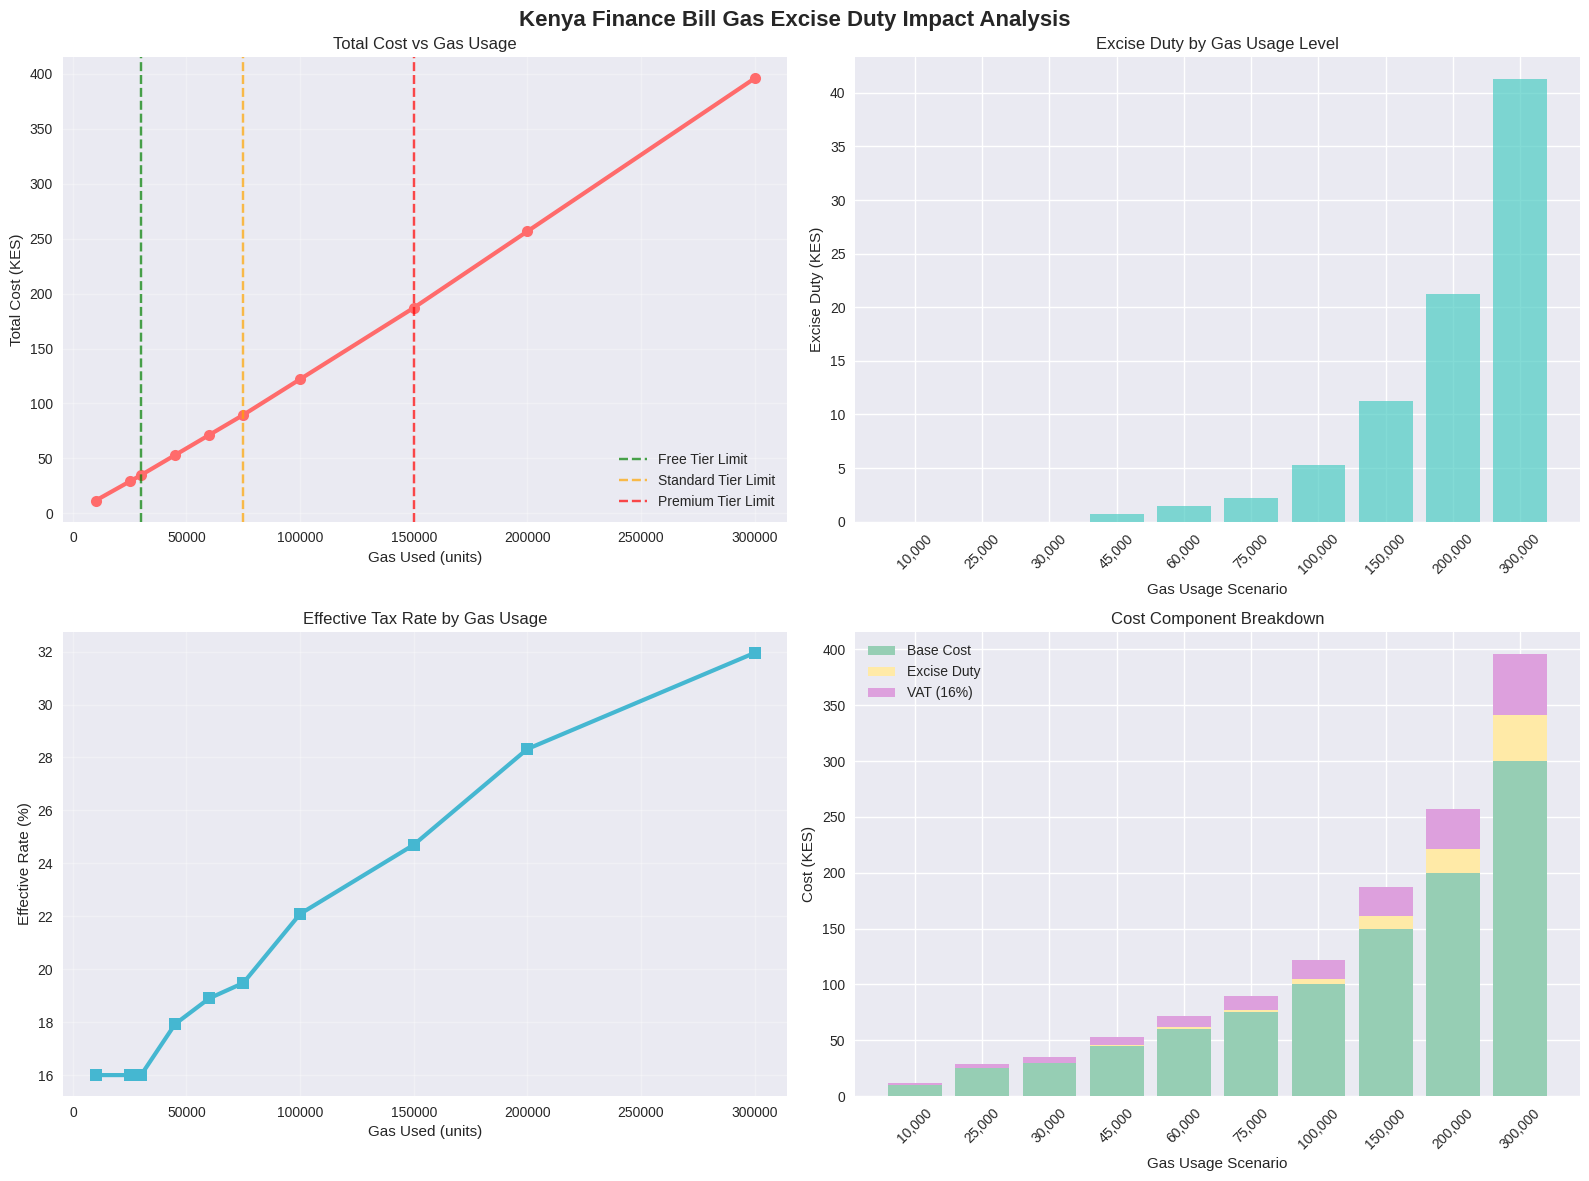


💰 DETAILED COST BREAKDOWN TABLE:
----------------------------------------------------------------------------------------------------
Gas Used     Base Cost    Excise Duty     VAT (16%)    Total Cost   Tier                
----------------------------------------------------------------------------------------------------
10,000      KES 10.0000 KES 0.0000     KES 1.6000  KES 11.6000 Basic (Free)
25,000      KES 25.0000 KES 0.0000     KES 4.0000  KES 29.0000 Basic (Free)
30,000      KES 30.0000 KES 0.0000     KES 4.8000  KES 34.8000 Basic (Free)
45,000      KES 45.0000 KES 0.7500     KES 7.3200  KES 53.0700 Standard (5%)
60,000      KES 60.0000 KES 1.5000     KES 9.8400  KES 71.3400 Standard (5%)
75,000      KES 75.0000 KES 2.2500     KES 12.3600 KES 89.6100 Standard (5%)
100,000     KES 100.0000KES 5.2500     KES 16.8400 KES 122.0900Premium (12%)
150,000     KES 150.0000KES 11.2500    KES 25.8000 KES 187.0500Premium (12%)
200,000     KES 200.0000KES 21.2500    KES 35.4000 KES 256.650

In [3]:
# AgriMedFinance AI with Kenya Finance Bill Gas Excise Duty Implementation
# Demonstrates tiered pricing based on gas consumption similar to excise duty principles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import hashlib
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class KenyaGasExciseDuty:
    """
    Implementation of Kenya Finance Bill-inspired excise duty on smart contract gas usage.
    Based on tiered pricing structure similar to excise duty on various goods and services.
    """

    def __init__(self):
        # Gas tiers based on Kenya Finance Bill excise duty principles
        self.gas_tiers = {
            'basic_tier': {
                'threshold': 30000,  # Free tier up to 30,000 gas units
                'rate': 0.0,         # 0% - Free basic services
                'description': 'Basic Service Tier (Free)'
            },
            'standard_tier': {
                'threshold': 75000,  # Standard tier 30,001 - 75,000 gas units
                'rate': 0.05,        # 5% excise duty
                'description': 'Standard Service Tier (5% Excise)'
            },
            'premium_tier': {
                'threshold': 150000, # Premium tier 75,001 - 150,000 gas units
                'rate': 0.12,        # 12% excise duty
                'description': 'Premium Service Tier (12% Excise)'
            },
            'luxury_tier': {
                'threshold': float('inf'), # Luxury tier 150,001+ gas units
                'rate': 0.20,        # 20% excise duty (luxury goods rate)
                'description': 'Luxury Service Tier (20% Excise)'
            }
        }

        # Base gas price per unit (in KES)
        self.base_gas_price = 0.001  # 0.001 KES per gas unit

        # VAT rate (as per Kenya Finance Bill)
        self.vat_rate = 0.16  # 16% VAT

        self.transaction_log = []

    def calculate_gas_cost(self, gas_used, service_type="general"):
        """
        Calculate the total cost including excise duty based on gas consumption.
        Implements progressive taxation similar to Kenya's excise duty structure.
        """

        base_cost = gas_used * self.base_gas_price
        excise_duty = 0
        tier_applied = ""

        # Determine excise duty tier
        if gas_used <= self.gas_tiers['basic_tier']['threshold']:
            excise_rate = self.gas_tiers['basic_tier']['rate']
            tier_applied = "Basic (Free)"
        elif gas_used <= self.gas_tiers['standard_tier']['threshold']:
            # Free tier + excise on excess
            excess_gas = gas_used - self.gas_tiers['basic_tier']['threshold']
            excise_duty = excess_gas * self.base_gas_price * self.gas_tiers['standard_tier']['rate']
            tier_applied = "Standard (5%)"
        elif gas_used <= self.gas_tiers['premium_tier']['threshold']:
            # Calculate tiered excise
            standard_excess = self.gas_tiers['standard_tier']['threshold'] - self.gas_tiers['basic_tier']['threshold']
            premium_excess = gas_used - self.gas_tiers['standard_tier']['threshold']

            excise_duty = (standard_excess * self.base_gas_price * self.gas_tiers['standard_tier']['rate'] +
                          premium_excess * self.base_gas_price * self.gas_tiers['premium_tier']['rate'])
            tier_applied = "Premium (12%)"
        else:
            # Luxury tier - highest excise rate
            standard_excess = self.gas_tiers['standard_tier']['threshold'] - self.gas_tiers['basic_tier']['threshold']
            premium_excess = self.gas_tiers['premium_tier']['threshold'] - self.gas_tiers['standard_tier']['threshold']
            luxury_excess = gas_used - self.gas_tiers['premium_tier']['threshold']

            excise_duty = (standard_excess * self.base_gas_price * self.gas_tiers['standard_tier']['rate'] +
                          premium_excess * self.base_gas_price * self.gas_tiers['premium_tier']['rate'] +
                          luxury_excess * self.base_gas_price * self.gas_tiers['luxury_tier']['rate'])
            tier_applied = "Luxury (20%)"

        # Calculate VAT on (base cost + excise duty)
        subtotal = base_cost + excise_duty
        vat_amount = subtotal * self.vat_rate

        total_cost = subtotal + vat_amount

        # Log transaction
        transaction_record = {
            'timestamp': datetime.now(),
            'gas_used': gas_used,
            'service_type': service_type,
            'base_cost': base_cost,
            'excise_duty': excise_duty,
            'vat_amount': vat_amount,
            'total_cost': total_cost,
            'tier_applied': tier_applied
        }

        self.transaction_log.append(transaction_record)

        return {
            'gas_used': gas_used,
            'base_cost': round(base_cost, 4),
            'excise_duty': round(excise_duty, 4),
            'vat_amount': round(vat_amount, 4),
            'total_cost': round(total_cost, 4),
            'tier_applied': tier_applied,
            'effective_rate': round((total_cost / base_cost - 1) * 100, 2) if base_cost > 0 else 0
        }

    def get_pricing_summary(self):
        """Generate a summary of the excise duty pricing structure"""
        return self.gas_tiers

    def analyze_usage_patterns(self):
        """Analyze gas usage patterns and excise duty collection"""
        if not self.transaction_log:
            return "No transactions recorded yet."

        df = pd.DataFrame(self.transaction_log)

        analysis = {
            'total_transactions': len(df),
            'total_gas_consumed': df['gas_used'].sum(),
            'total_excise_collected': df['excise_duty'].sum(),
            'total_vat_collected': df['vat_amount'].sum(),
            'average_gas_per_transaction': df['gas_used'].mean(),
            'tier_distribution': df['tier_applied'].value_counts().to_dict()
        }

        return analysis

class EnhancedSmartContract:
    """Enhanced Smart Contract with Kenya Finance Bill Gas Excise Implementation"""

    def __init__(self, contract_type):
        self.contract_type = contract_type
        self.transactions = []
        self.balance = 1000000  # Starting balance in wei
        self.gas_excise = KenyaGasExciseDuty()

    def execute_transaction(self, function_name, params, sender, estimated_gas=None):
        """Execute transaction with Kenya Finance Bill gas excise calculations"""

        # Simulate gas usage based on function complexity
        if estimated_gas:
            gas_used = estimated_gas
        else:
            base_gas = {
                'submitClaim': np.random.randint(35000, 65000),
                'createInsurancePolicy': np.random.randint(45000, 85000),
                'applyForLoan': np.random.randint(30000, 70000),
                'processPayment': np.random.randint(25000, 45000),
                'updateRecord': np.random.randint(20000, 40000)
            }
            gas_used = base_gas.get(function_name, np.random.randint(21000, 100000))

        # Calculate costs using Kenya Finance Bill excise structure
        cost_breakdown = self.gas_excise.calculate_gas_cost(gas_used, self.contract_type)

        success = True  # Assume success for demo

        transaction = {
            'tx_hash': hashlib.sha256(f"{function_name}{datetime.now()}".encode()).hexdigest()[:16],
            'function': function_name,
            'params': params,
            'sender': sender,
            'gas_used': gas_used,
            'gas_cost_breakdown': cost_breakdown,
            'timestamp': datetime.now(),
            'success': success
        }

        self.transactions.append(transaction)
        return transaction

class TelemedicineAIWithExcise:
    """Enhanced Telemedicine AI with Gas Excise Duty Implementation"""

    def __init__(self):
        self.diagnostic_model = self._create_diagnostic_model()
        self.treatment_model = self._create_treatment_model()
        self.contract = EnhancedSmartContract("Medical_Insurance")

    def _create_diagnostic_model(self):
        """Create a simple diagnostic model"""
        np.random.seed(42)
        n_samples = 1000
        X = np.random.randn(n_samples, 4)
        X[:, 0] = np.random.randint(18, 80, n_samples)  # age
        X[:, 1] = np.random.randint(1, 10, n_samples)  # symptoms count
        y = np.random.choice([0, 1, 2], n_samples, p=[0.6, 0.3, 0.1])

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def _create_treatment_model(self):
        """Create treatment recommendation model"""
        np.random.seed(42)
        n_samples = 500
        X = np.random.randn(n_samples, 3)
        y = np.random.uniform(50, 2000, n_samples)

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        return model

    def diagnose_patient(self, patient_data):
        """AI-powered patient diagnosis"""
        features = np.array([
            patient_data['age'],
            patient_data['symptoms_count'],
            patient_data['blood_pressure'],
            patient_data['lab_results']
        ]).reshape(1, -1)

        diagnosis = self.diagnostic_model.predict(features)[0]
        confidence = max(self.diagnostic_model.predict_proba(features)[0])

        diagnosis_map = {0: "Healthy", 1: "Needs Consultation", 2: "Emergency"}

        return {
            'diagnosis': diagnosis_map[diagnosis],
            'confidence': confidence,
            'recommendation': self._get_recommendation(diagnosis)
        }

    def _get_recommendation(self, diagnosis):
        recommendations = {
            0: "Continue regular health monitoring",
            1: "Schedule consultation within 48 hours",
            2: "Immediate medical attention required"
        }
        return recommendations[diagnosis]

    def process_insurance_claim(self, patient_id, diagnosis, estimated_cost, priority="normal"):
        """Process insurance claim with gas excise calculations"""

        if diagnosis in ["Needs Consultation", "Emergency"]:
            auto_approve = estimated_cost < 500 or diagnosis == "Emergency"

            # Estimate gas based on claim complexity and priority
            if diagnosis == "Emergency":
                estimated_gas = np.random.randint(80000, 120000)  # High gas for emergency
            elif estimated_cost > 1000:
                estimated_gas = np.random.randint(60000, 90000)   # Medium-high gas for complex claims
            else:
                estimated_gas = np.random.randint(25000, 45000)   # Low gas for simple claims

            claim_data = {
                'patient_id': patient_id,
                'diagnosis': diagnosis,
                'amount': estimated_cost,
                'auto_approved': auto_approve,
                'priority': priority
            }

            tx = self.contract.execute_transaction(
                'submitClaim',
                claim_data,
                f"patient_{patient_id}",
                estimated_gas
            )

            return {
                'claim_approved': auto_approve,
                'transaction_hash': tx['tx_hash'],
                'gas_used': tx['gas_used'],
                'gas_cost_breakdown': tx['gas_cost_breakdown'],
                'excise_tier': tx['gas_cost_breakdown']['tier_applied']
            }

        return {'claim_approved': False, 'reason': 'No treatment needed'}

def demonstrate_kenya_finance_bill_excise():
    """Main demonstration of Kenya Finance Bill gas excise duty implementation"""

    print("🇰🇪 KENYA FINANCE BILL GAS EXCISE DUTY DEMONSTRATION")
    print("=" * 70)
    print()

    # Initialize excise duty system
    gas_excise = KenyaGasExciseDuty()

    print("📋 EXCISE DUTY TIER STRUCTURE:")
    print("-" * 40)
    for tier_name, tier_info in gas_excise.gas_tiers.items():
        if tier_info['threshold'] == float('inf'):
            threshold_text = "150,001+"
        else:
            threshold_text = f"0 - {tier_info['threshold']:,}"

        print(f"{tier_info['description']}")
        print(f"  Gas Range: {threshold_text} units")
        print(f"  Excise Rate: {tier_info['rate']:.1%}")
        print()

    print("💡 DEMONSTRATION SCENARIOS:")
    print("-" * 40)

    # Scenario 1: Basic tier (Free)
    print("Scenario 1: Basic Medical Consultation")
    basic_cost = gas_excise.calculate_gas_cost(25000, "Medical Consultation")
    print(f"  Gas Used: {basic_cost['gas_used']:,} units")
    print(f"  Tier: {basic_cost['tier_applied']}")
    print(f"  Base Cost: KES {basic_cost['base_cost']:.4f}")
    print(f"  Excise Duty: KES {basic_cost['excise_duty']:.4f}")
    print(f"  VAT (16%): KES {basic_cost['vat_amount']:.4f}")
    print(f"  Total Cost: KES {basic_cost['total_cost']:.4f}")
    print()

    # Scenario 2: Standard tier
    print("Scenario 2: Complex Insurance Claim")
    standard_cost = gas_excise.calculate_gas_cost(55000, "Insurance Claim")
    print(f"  Gas Used: {standard_cost['gas_used']:,} units")
    print(f"  Tier: {standard_cost['tier_applied']}")
    print(f"  Base Cost: KES {standard_cost['base_cost']:.4f}")
    print(f"  Excise Duty: KES {standard_cost['excise_duty']:.4f}")
    print(f"  VAT (16%): KES {standard_cost['vat_amount']:.4f}")
    print(f"  Total Cost: KES {standard_cost['total_cost']:.4f}")
    print(f"  Effective Rate: +{standard_cost['effective_rate']:.1f}%")
    print()

    # Scenario 3: Premium tier
    print("Scenario 3: Large Agricultural Loan Processing")
    premium_cost = gas_excise.calculate_gas_cost(120000, "Agricultural Loan")
    print(f"  Gas Used: {premium_cost['gas_used']:,} units")
    print(f"  Tier: {premium_cost['tier_applied']}")
    print(f"  Base Cost: KES {premium_cost['base_cost']:.4f}")
    print(f"  Excise Duty: KES {premium_cost['excise_duty']:.4f}")
    print(f"  VAT (16%): KES {premium_cost['vat_amount']:.4f}")
    print(f"  Total Cost: KES {premium_cost['total_cost']:.4f}")
    print(f"  Effective Rate: +{premium_cost['effective_rate']:.1f}%")
    print()

    # Scenario 4: Luxury tier
    print("Scenario 4: High-Frequency Trading Operations")
    luxury_cost = gas_excise.calculate_gas_cost(200000, "High-Frequency Trading")
    print(f"  Gas Used: {luxury_cost['gas_used']:,} units")
    print(f"  Tier: {luxury_cost['tier_applied']}")
    print(f"  Base Cost: KES {luxury_cost['base_cost']:.4f}")
    print(f"  Excise Duty: KES {luxury_cost['excise_duty']:.4f}")
    print(f"  VAT (16%): KES {luxury_cost['vat_amount']:.4f}")
    print(f"  Total Cost: KES {luxury_cost['total_cost']:.4f}")
    print(f"  Effective Rate: +{luxury_cost['effective_rate']:.1f}%")
    print()

    # Enhanced Telemedicine Demo with Excise
    print("🏥 TELEMEDICINE WITH EXCISE DUTY DEMO:")
    print("-" * 50)

    telemedicine = TelemedicineAIWithExcise()

    # Emergency case (high gas usage)
    patient_emergency = {
        'age': 55,
        'symptoms_count': 8,
        'blood_pressure': 190,
        'lab_results': 95
    }

    diagnosis = telemedicine.diagnose_patient(patient_emergency)
    print(f"Emergency Diagnosis: {diagnosis['diagnosis']} (Confidence: {diagnosis['confidence']:.2f})")

    if diagnosis['diagnosis'] != "Healthy":
        insurance_result = telemedicine.process_insurance_claim(
            'EMG001',
            diagnosis['diagnosis'],
            1500,
            priority="emergency"
        )

        print(f"Insurance Claim: {'Approved' if insurance_result['claim_approved'] else 'Denied'}")
        print(f"Gas Used: {insurance_result['gas_used']:,} units")
        print(f"Excise Tier: {insurance_result['excise_tier']}")
        print(f"Total Gas Cost: KES {insurance_result['gas_cost_breakdown']['total_cost']:.4f}")

    print()

    # Regular consultation (low gas usage)
    patient_regular = {
        'age': 30,
        'symptoms_count': 2,
        'blood_pressure': 125,
        'lab_results': 65
    }

    diagnosis_regular = telemedicine.diagnose_patient(patient_regular)
    print(f"Regular Diagnosis: {diagnosis_regular['diagnosis']} (Confidence: {diagnosis_regular['confidence']:.2f})")

    if diagnosis_regular['diagnosis'] != "Healthy":
        insurance_regular = telemedicine.process_insurance_claim(
            'REG001',
            diagnosis_regular['diagnosis'],
            300,
            priority="normal"
        )

        print(f"Insurance Claim: {'Approved' if insurance_regular['claim_approved'] else 'Denied'}")
        print(f"Gas Used: {insurance_regular['gas_used']:,} units")
        print(f"Excise Tier: {insurance_regular['excise_tier']}")
        print(f"Total Gas Cost: KES {insurance_regular['gas_cost_breakdown']['total_cost']:.4f}")

    # Generate analysis
    print("\n📊 EXCISE DUTY COLLECTION ANALYSIS:")
    print("-" * 50)

    analysis = gas_excise.analyze_usage_patterns()
    print(f"Total Transactions: {analysis['total_transactions']}")
    print(f"Total Gas Consumed: {analysis['total_gas_consumed']:,} units")
    print(f"Total Excise Collected: KES {analysis['total_excise_collected']:.4f}")
    print(f"Total VAT Collected: KES {analysis['total_vat_collected']:.4f}")
    print(f"Average Gas per Transaction: {analysis['average_gas_per_transaction']:,.0f} units")

    print("\nTier Distribution:")
    for tier, count in analysis['tier_distribution'].items():
        print(f"  {tier}: {count} transactions")

    # Create visualization
    create_excise_duty_visualization(gas_excise)

    return gas_excise, telemedicine

def create_excise_duty_visualization(gas_excise):
    """Create visualizations for the excise duty system"""

    # Sample different gas usage levels for visualization
    gas_levels = np.array([10000, 25000, 30000, 45000, 60000, 75000, 100000, 150000, 200000, 300000])
    costs = []

    for gas in gas_levels:
        cost_breakdown = gas_excise.calculate_gas_cost(gas, "Sample Transaction")
        costs.append(cost_breakdown)

    # Create DataFrame for plotting
    df_costs = pd.DataFrame(costs)

    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Kenya Finance Bill Gas Excise Duty Impact Analysis', fontsize=16, fontweight='bold')

    # 1. Total Cost vs Gas Usage
    ax1.plot(gas_levels, df_costs['total_cost'], 'o-', linewidth=3, markersize=8, color='#FF6B6B')
    ax1.axvline(x=30000, color='green', linestyle='--', alpha=0.7, label='Free Tier Limit')
    ax1.axvline(x=75000, color='orange', linestyle='--', alpha=0.7, label='Standard Tier Limit')
    ax1.axvline(x=150000, color='red', linestyle='--', alpha=0.7, label='Premium Tier Limit')
    ax1.set_title('Total Cost vs Gas Usage')
    ax1.set_xlabel('Gas Used (units)')
    ax1.set_ylabel('Total Cost (KES)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Excise Duty by Gas Level
    ax2.bar(range(len(gas_levels)), df_costs['excise_duty'], color='#4ECDC4', alpha=0.7)
    ax2.set_title('Excise Duty by Gas Usage Level')
    ax2.set_xlabel('Gas Usage Scenario')
    ax2.set_ylabel('Excise Duty (KES)')
    ax2.set_xticks(range(len(gas_levels)))
    ax2.set_xticklabels([f'{g:,}' for g in gas_levels], rotation=45)

    # 3. Effective Tax Rate
    ax3.plot(gas_levels, df_costs['effective_rate'], 's-', linewidth=3, markersize=8, color='#45B7D1')
    ax3.set_title('Effective Tax Rate by Gas Usage')
    ax3.set_xlabel('Gas Used (units)')
    ax3.set_ylabel('Effective Rate (%)')
    ax3.grid(True, alpha=0.3)

    # 4. Cost Component Breakdown (Stacked Bar)
    base_costs = df_costs['base_cost']
    excise_duties = df_costs['excise_duty']
    vat_amounts = df_costs['vat_amount']

    indices = range(len(gas_levels))
    ax4.bar(indices, base_costs, label='Base Cost', color='#96CEB4')
    ax4.bar(indices, excise_duties, bottom=base_costs, label='Excise Duty', color='#FFEAA7')
    ax4.bar(indices, vat_amounts, bottom=base_costs + excise_duties, label='VAT (16%)', color='#DDA0DD')

    ax4.set_title('Cost Component Breakdown')
    ax4.set_xlabel('Gas Usage Scenario')
    ax4.set_ylabel('Cost (KES)')
    ax4.set_xticks(indices)
    ax4.set_xticklabels([f'{g:,}' for g in gas_levels], rotation=45)
    ax4.legend()

    plt.tight_layout()
    plt.show()

    # Create a summary table
    print("\n💰 DETAILED COST BREAKDOWN TABLE:")
    print("-" * 100)
    print(f"{'Gas Used':<12} {'Base Cost':<12} {'Excise Duty':<15} {'VAT (16%)':<12} {'Total Cost':<12} {'Tier':<20}")
    print("-" * 100)

    for i, gas in enumerate(gas_levels):
        cost = costs[i]
        print(f"{gas:,}".ljust(12) +
              f"KES {cost['base_cost']:.4f}".ljust(12) +
              f"KES {cost['excise_duty']:.4f}".ljust(15) +
              f"KES {cost['vat_amount']:.4f}".ljust(12) +
              f"KES {cost['total_cost']:.4f}".ljust(12) +
              f"{cost['tier_applied']}")

def generate_policy_recommendations():
    """Generate policy recommendations based on the excise duty analysis"""

    print("\n📋 POLICY RECOMMENDATIONS:")
    print("=" * 50)

    recommendations = [
        {
            'title': 'Progressive Taxation Benefits',
            'description': 'The tiered structure encourages efficient smart contract usage while generating revenue from high-consumption users.'
        },
        {
            'title': 'Support for Small-Scale Users',
            'description': 'Free tier up to 30,000 gas units supports small farmers and basic healthcare users without additional burden.'
        },
        {
            'title': 'Revenue Generation',
            'description': 'Excise duty on premium services can fund digital infrastructure and blockchain development initiatives.'
        },
        {
            'title': 'Market Regulation',
            'description': 'Higher rates on luxury-tier usage (200k+ gas) can prevent spam transactions and maintain network quality.'
        },
        {
            'title': 'Economic Incentives',
            'description': 'Developers are incentivized to create gas-efficient smart contracts to keep costs low for users.'
        }
    ]

    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec['title']}")
        print(f"   {rec['description']}")
        print()

# Main execution
if __name__ == '__main__':
    # Run the complete demonstration
    gas_excise_system, telemedicine_ai = demonstrate_kenya_finance_bill_excise()

    # Generate policy recommendations
    generate_policy_recommendations()

    print("\n🎯 DEMONSTRATION COMPLETE!")
    print("The system shows how Kenya Finance Bill excise duty principles")
    print("can be applied to smart contract gas usage, creating a fair and")
    print("progressive pricing structure that supports basic users while")
    print("generating revenue from premium services.")